In [ ]:
import numpy as np
import os
import re
import math

# Problem 2.1

### Part (a)

In [125]:
folder_path1 = "/Users/stephenandrews/Downloads/MIT Schoolwork/Spring 2025/6.3732/6373Pset2/pset2_data/hic_part1" # 133 files
folder_path2 = "/Users/stephenandrews/Downloads/MIT Schoolwork/Spring 2025/6.3732/6373Pset2/pset2_data/hic_part2" # 120 files

sums = np.zeros(253)
avgs = np.zeros(253) # each entry is the sum of the log(1+freq) across data in one file
stds = np.zeros(253) # each entry is the sum of squares of the log(1+freq) across data in one file
dims = np.zeros(22) # entry i is the max dimension of the i+1th chromosome

inter_chromosome_sites_1 = [(f'chr{i}_chr{j}.txt', i, j) for i in range(1, 8) for j in range(i, 23) if i != j]
inter_chromosome_sites_2 = [(f'chr{i}_chr{j}.txt', i, j) for i in range(8, 23) for j in range(i, 23) if i != j]


In [127]:
# AVERAGES

count = 0 # what file we are on

for filename, i, j in inter_chromosome_sites_1: # hic_part1
    file_path = os.path.join(folder_path1, filename)
    sparse = np.loadtxt(file_path)
    sparse = sparse[~np.isnan(sparse).any(axis=1)]

    sparse[:, 2] = np.log1p(sparse[:, 2])
    sparse[:, 0] /= 250000
    sparse[:, 1] /= 250000

    chr1_dim = np.max(sparse[:, 0])
    chr2_dim = np.max(sparse[:, 1])

    dims[i-1] = max(dims[i-1], chr1_dim)
    dims[j-1] = max(dims[j-1], chr2_dim)

    file_sum = np.sum(sparse[:, 2])

    sums[count] = file_sum
    count+=1


for filename, i, j in inter_chromosome_sites_2: # hic_part1
    file_path = os.path.join(folder_path2, filename)
    sparse = np.loadtxt(file_path)
    sparse = sparse[~np.isnan(sparse).any(axis=1)]

    sparse[:, 2] = np.log1p(sparse[:, 2])
    sparse[:, 0] /= 250000
    sparse[:, 1] /= 250000

    chr1_dim = np.max(sparse[:, 0])
    chr2_dim = np.max(sparse[:, 1])

    dims[i-1] = max(dims[i-1], chr1_dim)
    dims[j-1] = max(dims[j-1], chr2_dim)

    file_sum = np.sum(sparse[:, 2])

    sums[count] = file_sum
    count+=1

In [129]:
count = 0

for filename, i, j in inter_chromosome_sites_1:
    avgs[count] = sums[count]/((dims[i-1]+1)*(dims[j-1]+1))
    count += 1

for filename, i, j in inter_chromosome_sites_2:
    avgs[count] = sums[count]/((dims[i-1]+1)*(dims[j-1]+1))
    count += 1

In [130]:
print(avgs)

[0.6885681  0.72671095 0.70134617 0.69049666 0.69723381 0.66852614
 0.66403038 0.50957422 0.64639191 0.64699846 0.6537848  0.61113986
 0.59906915 0.58248221 0.49642518 0.56677681 0.53789835 0.47169618
 0.47774946 0.40828383 0.45505146 0.79083028 0.77292145 0.75550182
 0.76738531 0.72959371 0.73178234 0.55958301 0.70581478 0.71960072
 0.71980563 0.65288807 0.64014141 0.61347436 0.55211461 0.62957012
 0.58793164 0.5378022  0.54897217 0.48656483 0.48776051 0.836906
 0.82969114 0.85692022 0.81418768 0.80917941 0.64563032 0.8031936
 0.81603503 0.82222493 0.66045208 0.65081377 0.62192023 0.67410567
 0.77501167 0.72333055 0.73098548 0.73124439 0.5081453  0.48005072
 0.80798877 0.82481243 0.80434209 0.79239925 0.63792782 0.78680908
 0.80441418 0.81389803 0.66410696 0.66097851 0.63462455 0.67287553
 0.78203546 0.73495301 0.75328968 0.72022733 0.53409168 0.48948327
 0.82601507 0.79950969 0.79887755 0.63996348 0.79006394 0.80530975
 0.81186627 0.66741619 0.65750947 0.62681868 0.68750246 0.7714481

In [82]:
# STDS

count = 0 # what file we are on

for filename in sorted(os.listdir(folder_path1)): # hic_part1

    file_path = os.path.join(folder_path1, filename)
    file_sum_squares = 0

    with open(file_path, 'r') as file:
        
        line = file.readline()
        while line:
            freq = float(line.split()[-1])
            value = math.log(freq+1)

            if not np.isnan(value): # skip nans
                file_sum_squares += (value-avgs[count])**2
            else:
                file_sum_squares += (avgs[count])**2

            line = file.readline()

    stds[count] = math.sqrt(file_sum_squares/(237*252-1))
    count += 1

print(count)

for filename in sorted(os.listdir(folder_path2)):

    file_path = os.path.join(folder_path2, filename)
    file_sum_squares = 0

    with open(file_path, 'r') as file:
        line = file.readline()

        while line:
            freq = float(line.split()[-1])
            value = math.log(freq+1)

            if not np.isnan(value):
                file_sum_squares += (value-avgs[count])**2
            else:
                file_sum_squares += (avgs[count])**2

            line = file.readline()

    stds[count] = math.sqrt(file_sum_squares/(237*252-1))
    count += 1



133


In [83]:
print(stds)

[38.89410668 10.47527063 10.56824991 10.62136662  7.36048794  6.38070217
  5.65245622  3.21137222  3.46827099  2.83241262  1.22677546 29.5352076
  1.45303249  0.56658216  0.83629819 23.34996836 20.56742369 18.55883984
 17.31712743 14.3717934  12.52307213  7.5525866  11.54828636 11.96436702
 11.83091086  7.77826795  6.7758765   5.89127985  3.7004167   4.020501
  3.12336391  1.55443496 47.80100552  1.81582106  0.76369992  0.91215078
 25.41828205 22.7712645  20.4183931  19.208877   15.75290043 13.95233411
  8.44138669 10.3468552  10.65139981 10.67590445  5.56909265  4.85978859
  4.18460396  3.78773286  4.17386747  3.29129983  2.02364648  2.26290724
  0.5506609   0.56117702 28.05307706 18.93789319 17.24656012 16.65472399
 13.64952958 11.89456102  7.71169231  9.29414485  9.67455316  9.75095136
  5.14049076  4.56011941  3.94721786  3.44305564  3.87997323  3.05844575
  1.91251246  1.97964172  0.54429741  0.53472991 23.73584313 15.43893705
 14.67393282 12.43407786 10.68025959  6.99867459  8.59

### Part (b)

In [65]:
import matplotlib.pyplot as plt
import scipy.sparse as sp

[[  1.          0.         14.648587 ]
 [  2.          0.          2.7692891]
 [  4.          0.          2.4619446]
 ...
 [234.        251.          1.8142017]
 [235.        251.          5.334248 ]
 [236.        251.         16.32335  ]]


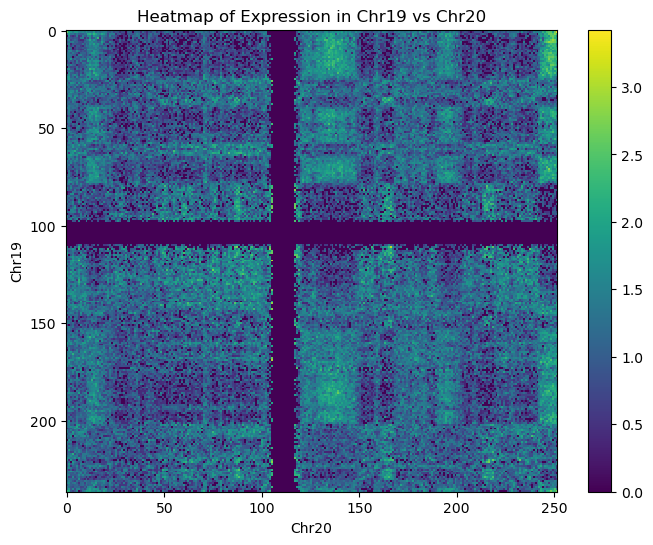

In [ ]:
path_19_20 = "/Users/stephenandrews/Downloads/MIT Schoolwork/Spring 2025/6.3732/6373Pset2/pset2_data/hic_part2/chr19_chr20.txt"
char19_char20 = np.loadtxt(path_19_20)

# normalize matrix locations
char19_char20[:, 0] /= 250000
char19_char20[:, 1] /= 250000
char19_char20[:, 2] += 1

rows = char19_char20[:, 0]
cols = char19_char20[:, 1]
data = np.log(char19_char20[:, 2])

print(char19_char20)

sparse_matrix = sp.csr_matrix((data, (rows, cols)), shape=(237, 252))
dense_matrix = sparse_matrix.toarray()

plt.figure(figsize=(8, 6))
plt.imshow(dense_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title("Heatmap of Expression in Chr19 vs Chr20")
plt.ylabel("Chr19")
plt.xlabel("Chr20")
plt.show()

### Part (d)

In [ ]:
import random
import scipy.stats as stats

def calc_pval(m, rows, cols, mu, sigma):
    return 1-stats.norm.cdf((m-mu)*math.sqrt(rows*cols)/sigma)

def grid_search(rows, cols, mu, sigma, matrix):
    # 0 to 236
    # 0 to 251

    start_row = random.randint(0, rows-1)
    start_col = random.randint(0, cols-1)

    rows_start = start_row
    rows_end = start_row+1
    cols_start = start_col
    cols_end = start_col+1

    submatrix = matrix[rows_start:rows_end, cols_start:cols_end]
    m = np.mean(submatrix)
    p_value = calc_pval(m, rows_end-rows_start, cols_end-cols_start, mu, sigma)

    while True:
        #row up
        if rows_start-1 >= 0:
            submatrix = matrix[rows_start-1:rows_end, cols_start:cols_end]
            m = np.mean(submatrix)
            p_value_up = calc_pval(m, rows_end-rows_start+1, cols_end-cols_start, mu, sigma)

        else:
            p_value_up = 1

        #row down
        if rows_end+1 <= rows:
            submatrix = matrix[rows_start:rows_end+1, cols_start:cols_end]
            m = np.mean(submatrix)
            p_value_down = calc_pval(m, rows_end-rows_start+1, cols_end-cols_start, mu, sigma)

        else:
            p_value_down = 1

        #col left
        if cols_start-1 >= 0:
            submatrix = matrix[rows_start:rows_end, cols_start-1:cols_end]
            m = np.mean(submatrix)
            p_value_left = calc_pval(m, rows_end-rows_start, cols_end-cols_start+1, mu, sigma)

        else:
            p_value_left = 1

        # col right
        if cols_end+1 <= cols:
            submatrix = matrix[rows_start:rows_end, cols_start:cols_end+1]
            m = np.mean(submatrix)
            p_value_right = calc_pval(m, rows_end-rows_start+1, cols_end-cols_start+1, mu, sigma)

        else:
            p_value_right = 1


        min_p = min(p_value_up, p_value_down, p_value_left, p_value_right)

        if min_p > p_value:
            return p_value

        else:
            if p_value_up == min_p:
                rows_start -= 1
            elif p_value_down == min_p:
                rows_start += 1
            elif p_value_left == min_p:
                cols_start -= 1
            elif p_value_right == min_p:
                cols_end += 1

        


        



    

    






SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (424267450.py, line 67)